In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Étape 1 : Lecture des données
data = pd.read_excel('Total.xlsx')

In [5]:
# Supprimer ces colonnes du DataFrame
data_reduit = data.drop(columns=['Player_index','Player','WEEKLY_GROSS','TOTAL_GROSS','EXPIRATION','LENGTH','POS1','POS2','COUNTRY','Current_Club','League'])

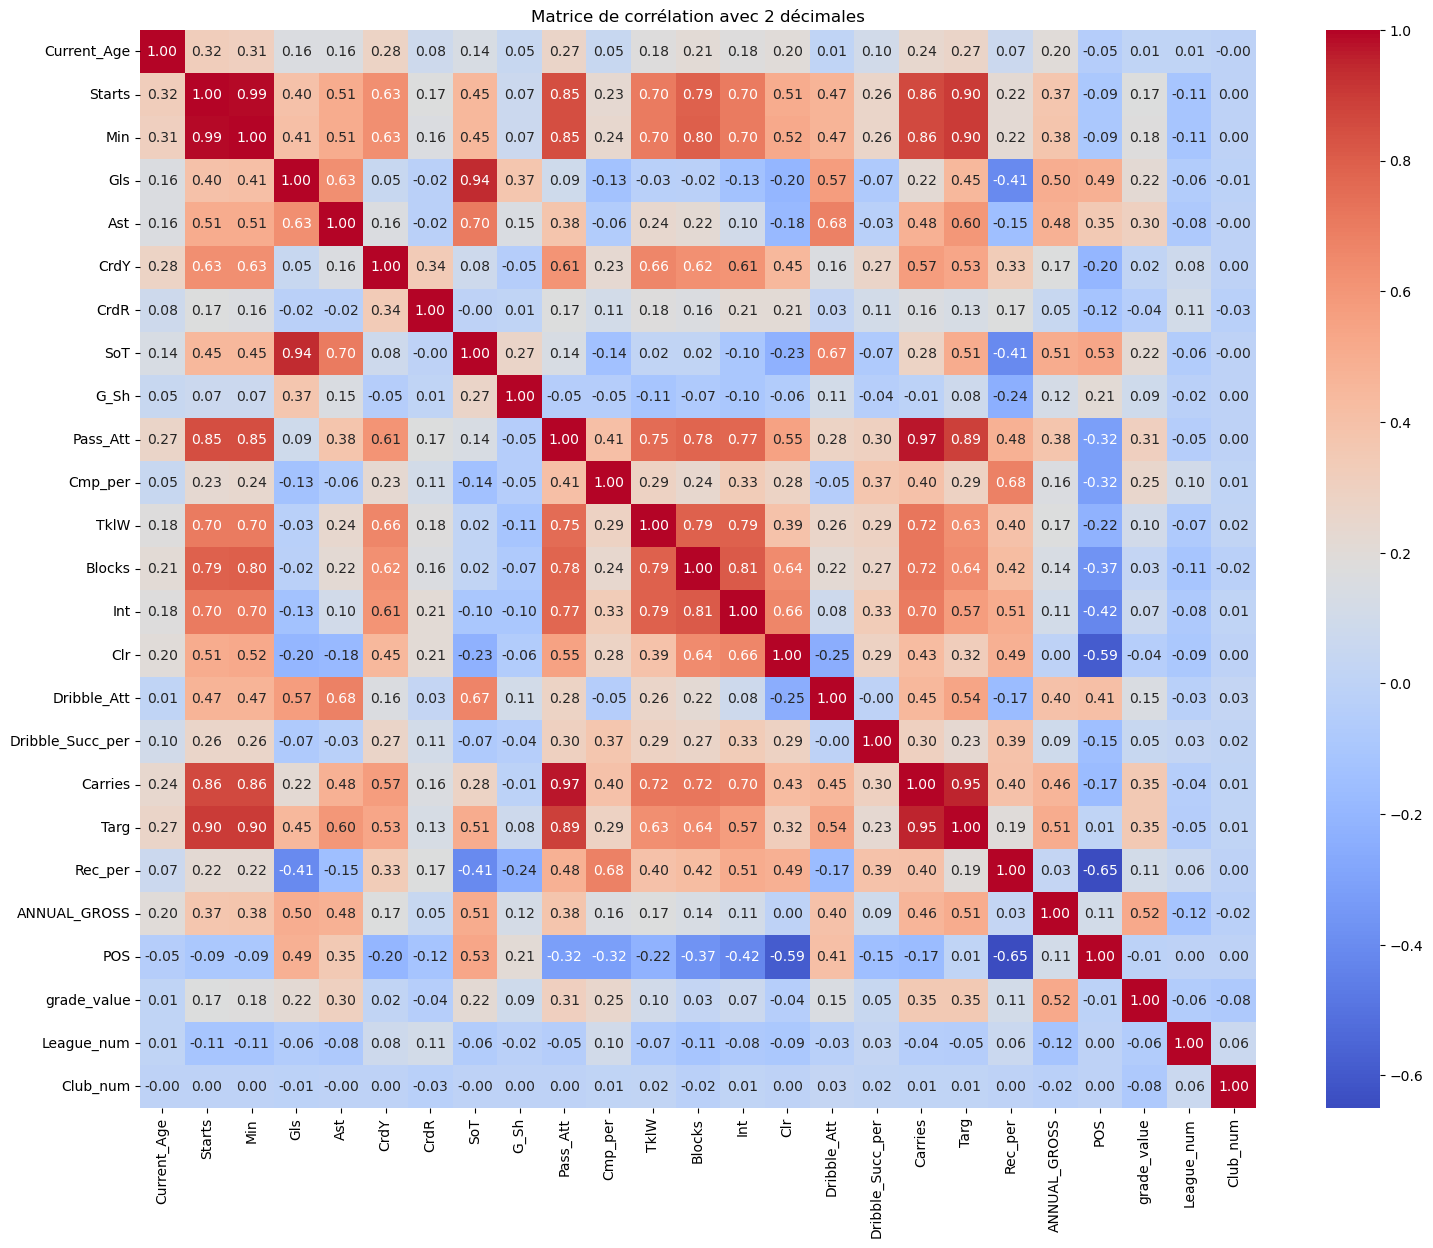

In [6]:
# Étape 2 : Analyse exploratoire et sélection des caractéristiques
# Calcul de la matrice de corrélation et limitation à 2 décimales
correlation_matrix = data_reduit.corr().round(2)

# Afficher la matrice
plt.figure(figsize=(18, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')  # fmt pour 2 décimales
plt.title("Matrice de corrélation avec 2 décimales")
plt.show()

In [7]:
# Supprimer les colonnes avec une corrélation moins de 0.1 avec le target
data_clean = data_reduit.drop(columns=['CrdR','Clr','Dribble_Succ_per', 'Rec_per', 'League_num','Club_num'])

In [8]:
data_clean.head()

,Current_Age,Starts,Min,Gls,Ast,CrdY,SoT,G_Sh,Pass_Att,Cmp_per,TklW,Blocks,Int,Dribble_Att,Carries,Targ,ANNUAL_GROSS,POS,grade_value
0,21,8.33,747.33,2.00,0.67,0.33,8.67,0.06,88.0,51.83,4.33,5.67,1.67,8.67,117.33,297.33,1415001.0,3,0.37
1,31,30.33,2691.33,1.00,3.33,3.67,3.33,0.06,1604.0,75.77,21.67,52.33,25.33,21.33,1021.67,1100.67,3065836.0,1,0.49
2,19,10.00,782.00,0.00,0.00,3.00,1.00,0.00,404.0,83.90,6.00,17.00,12.00,15.00,322.00,301.00,580000.0,1,0.38
3,30,19.00,1797.50,5.00,4.00,1.50,15.50,0.10,999.0,85.05,27.00,21.50,13.00,27.50,912.00,1150.00,8970000.0,2,3.09
4,23,45.67,4083.00,0.67,4.33,6.00,2.33,0.08,1975.0,81.03,66.67,111.67,72.67,89.33,1474.67,1476.33,5518504.0,1,1.51


In [9]:
# Séparer les caractéristiques (X) et la cible (y)
X = data_clean.drop(columns=['ANNUAL_GROSS'])  # Exclure la colonne salaire (cible)
y = data_clean['ANNUAL_GROSS']

In [10]:
# Étape 3 : Division des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Étape 4 : Modélisation de base avec Random Forest
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [12]:
# Prédictions initiales
y_pred = model.predict(X_test)

In [34]:
# Évaluation initiale
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
print(f"Modèle initial - RMSE: {rmse}, R²: {r2}")

Modèle initial - RMSE: 2238951.3678944833, R²: 0.7526515896171325


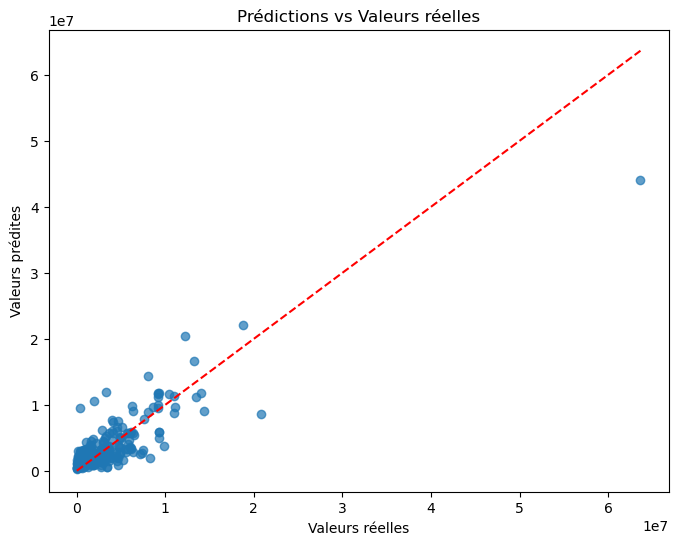

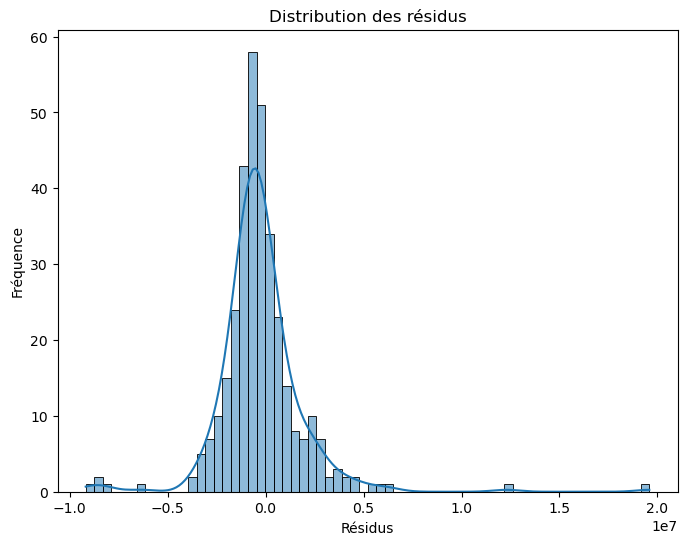

In [18]:
# Étape 5 : Visualisation des résultats
# Prédictions vs Réel
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Valeurs réelles")
plt.ylabel("Valeurs prédites")
plt.title("Prédictions vs Valeurs réelles")
plt.show()

# Graphique des résidus
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.title("Distribution des résidus")
plt.xlabel("Résidus")
plt.ylabel("Fréquence")
plt.show()

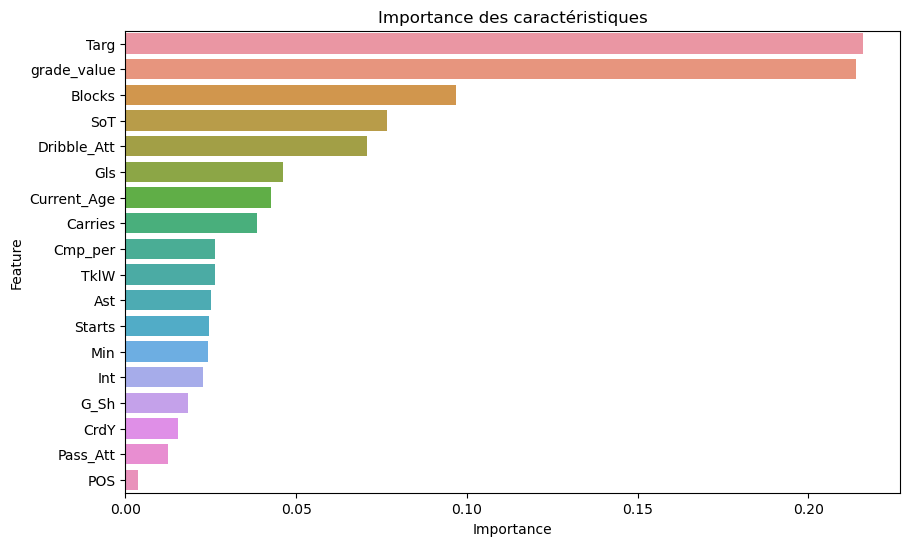

In [20]:
# Étape 6 : Importance des caractéristiques
importances = model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Visualiser les caractéristiques importantes
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title("Importance des caractéristiques")
plt.show()